In [12]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import umap
from sklearn.manifold import TSNE
import os

# Define the new base path provided by the user
base_path = '/content/drive/MyDrive/24341180_425Project/'

# Create necessary directories for saving results if they don't exist
os.makedirs(base_path + 'results/models', exist_ok=True)
os.makedirs(base_path + 'results/metrics', exist_ok=True)
os.makedirs(base_path + 'results/visualizations', exist_ok=True)
print(f"Base path set to: {base_path}")
print("Results directories created/checked.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base path set to: /content/drive/MyDrive/24341180_425Project/
Results directories created/checked.


In [11]:
# Define paths
#base_path = '/content/drive/MyDrive/NeuralNetworks_VAE_Project/'
#data_path = base_path + 'data/'

# Load your files
dataset = pd.read_csv('/content/drive/MyDrive/24341180_425Project/dataset.csv')  # Path to dataset.csv
preprocessed_data = np.load('/content/drive/MyDrive/24341180_425Project/processed_ids.npy')
spectrogram_data = np.load('/content/drive/MyDrive/24341180_425Project/processed_spectrograms.npy')  # Path to processed spectrograms
#dataset = pd.read_csv(data_path + 'dataset.csv')
#preprocessed_data = np.load(data_path + 'processed_ids.npy')
#spectrogram_data = np.load(data_path + 'processed_spectrograms.npy')

# Check shapes
print(f"Dataset shape: {dataset.shape}")
print(f"Preprocessed data shape: {preprocessed_data.shape}")
print(f"Spectrogram shape: {spectrogram_data.shape}")
# ========================================
# DEBUG: Check what's in X
# ========================================
print("DEBUGGING X:")
print("="*60)
print(f"X shape: {X.shape}")
print(f"X dimensions: {X.ndim}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1] if X.ndim > 1 else 'N/A'}")
print(f"X type: {type(X)}")
print(f"X dtype: {X.dtype}")
print("="*60)

# Check original data too
print("\nORIGINAL DATA:")
print(f"preprocessed_data shape: {preprocessed_data.shape}")
print(f"spectrogram_data shape: {spectrogram_data.shape}")
print("="*60)

Dataset shape: (796, 5)
Preprocessed data shape: (683,)
Spectrogram shape: (683, 128, 256)
DEBUGGING X:
X shape: (683, 32768)
X dimensions: 2
Number of samples: 683
Number of features: 32768
X type: <class 'numpy.ndarray'>
X dtype: float32

ORIGINAL DATA:
preprocessed_data shape: (683,)
spectrogram_data shape: (683, 128, 256)


In [13]:
# Load your files using the defined base_path
dataset = pd.read_csv(os.path.join(base_path, 'dataset.csv'))
preprocessed_data = np.load(os.path.join(base_path, 'processed_ids.npy'))
spectrogram_data = np.load(os.path.join(base_path, 'processed_spectrograms.npy'))

# Check shapes
print(f"Dataset shape: {dataset.shape}")
print(f"Preprocessed data shape: {preprocessed_data.shape}")
print(f"Spectrogram shape: {spectrogram_data.shape}")
# ========================================
# DEBUG: Check what's in X
# ========================================
# This block will cause NameError if X is not defined yet, it's typically placed after X is created.
# It is kept here as it was in the original notebook, but will likely error if run out of order.
# For now, it will be commented out to avoid errors until X is properly defined.
# print("DEBUGGING X:")
# print("="*60)
# print(f"X shape: {X.shape}")
# print(f"X dimensions: {X.ndim}")
# print(f"Number of samples: {X.shape[0]}")
# print(f"Number of features: {X.shape[1] if X.ndim > 1 else 'N/A'}")
# print(f"X type: {type(X)}")
# print(f"X dtype: {X.dtype}")
# print("="*60)

# Check original data too
print("\nORIGINAL DATA:")
print(f"preprocessed_data shape: {preprocessed_data.shape}")
print(f"spectrogram_data shape: {spectrogram_data.shape}")
print("="*60)

Dataset shape: (796, 5)
Preprocessed data shape: (683,)
Spectrogram shape: (683, 128, 256)

ORIGINAL DATA:
preprocessed_data shape: (683,)
spectrogram_data shape: (683, 128, 256)


In [10]:
print(f"X shape: {X.shape}")
print(f"X data type: {X.dtype}")
print(f"First 5 rows of X:\n{X[:5, :5]}")

X shape: (683, 32768)
X data type: float32
First 5 rows of X:
[[-0.9297254  -0.4850739   0.69008136 -0.23802954 -1.1815199 ]
 [-0.85659814  0.64364773  0.52020085  0.25366887  0.24336888]
 [ 0.5964627   0.33653268  0.09080473  0.10128512  0.84884304]
 [-0.18994354  0.46490654  0.8670011   0.9832786   0.69628954]
 [-1.276096   -1.189036   -1.1076237  -1.2641082  -0.89480436]]


In [9]:
# ========================================
# CELL 3 (COMPLETE FIX): Fix Data Loading
# ========================================
print("="*60)
print("FIXING DATA PREPROCESSING")
print("="*60)

# Define paths - ensure these are available
# base_path and data_path are defined in a previous cell
# If you intend to use the commented out lines, ensure base_path and data_path are set correctly.
# For now, I will assume base_path and data_path are already defined as per the notebook state.

# Load raw data again
preprocessed_data = np.load('/content/drive/MyDrive/24341180_425Project/processed_ids.npy')
spectrogram_data = np.load('/content/drive/MyDrive/24341180_425Project/processed_spectrograms.npy')

print(f"Raw preprocessed_data shape: {preprocessed_data.shape}")
print(f"Raw spectrogram_data shape: {spectrogram_data.shape}")

# The issue: your data was incorrectly reshaped to (683, 1)
# Let's use the original data properly

# Option 1: Use preprocessed_data if it has features
if len(preprocessed_data.shape) == 2 and preprocessed_data.shape[1] > 1:
    X_raw = preprocessed_data
    print(f"\n✓ Using preprocessed_data: {X_raw.shape}")

elif len(preprocessed_data.shape) == 2 and preprocessed_data.shape[0] > 1 and preprocessed_data.shape[1] == 1:
    # Data is (n, 1) - this is wrong! Need to use spectrogram instead
    print("\n⚠️ Preprocessed data has only 1 feature. Using spectrogram instead...")

    if len(spectrogram_data.shape) == 3:
        # Spectrogram is (n_samples, time, frequency)
        n_samples = spectrogram_data.shape[0]
        X_raw = spectrogram_data.reshape(n_samples, -1)
        print(f"✓ Flattened spectrogram to: {X_raw.shape}")
    elif len(spectrogram_data.shape) == 2:
        X_raw = spectrogram_data
        print(f"✓ Using 2D spectrogram: {X_raw.shape}")
    else:
        raise ValueError("Cannot process spectrogram data!")

elif len(preprocessed_data.shape) == 1:
    # 1D array - need to reshape based on number of samples
    print("\n⚠️ Preprocessed data is 1D. Reshaping based on spectrogram...")

    if len(spectrogram_data.shape) >= 2:
        n_samples = spectrogram_data.shape[0]
        # This line was problematic before, assuming preprocessed_data was features
        # Let's ensure we are using spectrogram_data for feature extraction if preprocessed_data is 1D and not suitable.
        # Given the previous execution, it seems spectrogram_data is the source for X.
        X_raw = spectrogram_data.reshape(n_samples, -1)
        print(f"✓ Using flattened spectrogram: {X_raw.shape}")
    else:
        raise ValueError("Cannot determine data shape!")
else:
    # Last resort: use spectrogram
    print("\n⚠️ Using spectrogram data...")
    X_raw = spectrogram_data.reshape(spectrogram_data.shape[0], -1)
    print(f"✓ Shape: {X_raw.shape}")

# Verify we have good data
n_samples, n_features = X_raw.shape
print(f"\n{'='*60}")
print(f"FINAL DATA CHECK")
print(f"{'='*60}")
print(f"✓ Samples: {n_samples}")
print(f"✓ Features: {n_features}")

if n_features < 2:
    raise ValueError(f"ERROR: Only {n_features} feature(s)! Need at least 10 features for meaningful analysis.")

if n_samples < 10:
    raise ValueError(f"ERROR: Only {n_samples} sample(s)! Need at least 10 samples.")

# Normalize
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)

print(f"\n✓ Normalization complete")
print(f"✓ Final shape: {X.shape}")
print(f"✓ Feature range: [{X.min():.3f}, {X.max():.3f}]")
print(f"✓ Mean: {X.mean():.6f}, Std: {X.std():.3f}")


FIXING DATA PREPROCESSING
Raw preprocessed_data shape: (683,)
Raw spectrogram_data shape: (683, 128, 256)

⚠️ Preprocessed data is 1D. Reshaping based on spectrogram...
✓ Using flattened spectrogram: (683, 32768)

FINAL DATA CHECK
✓ Samples: 683
✓ Features: 32768

✓ Normalization complete
✓ Final shape: (683, 32768)
✓ Feature range: [-6.143, 4.342]
✓ Mean: 0.000000, Std: 1.000


In [14]:
# ========================================
# CELL 4: Build VAE with Correct Loss Function
# ========================================
import gc
gc.collect()
tf.keras.backend.clear_session()

latent_dim = 64
input_dim = X.shape[1]  # 32768

print("="*60)
print("BUILDING VAE MODEL")
print("="*60)
print(f"Input dimension: {input_dim}")
print(f"Latent dimension: {latent_dim}")

# Encoder
encoder_inputs = keras.Input(shape=(input_dim,))
x = layers.Dense(512, activation='relu')(encoder_inputs)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
z_mean = layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)

# Sampling
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')

# Decoder
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(128, activation='relu')(latent_inputs)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
decoder_outputs = layers.Dense(input_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name='decoder')

# VAE Model with FIXED loss function
class VAE(keras.Model):
    def __init__(self, encoder, decoder, beta=0.1, **kwargs): # Added beta
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.beta = beta # KL weight
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(name="recon_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [self.total_loss_tracker, self.reconstruction_loss_tracker, self.kl_loss_tracker]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)

            # Use REDUCE_SUM to capture the magnitude of 32k features
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(tf.square(data - reconstruction), axis=-1)
            )

            # Apply Beta to prevent the KL loss from collapsing the clusters
            kl_loss = -0.5 * tf.reduce_mean(
                tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1)
            )

            total_loss = reconstruction_loss + (self.beta * kl_loss)

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "recon_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    def test_step(self, data):
        z_mean, z_log_var, z = self.encoder(data)
        reconstruction = self.decoder(z)

        # Reconstruction loss
        reconstruction_loss = tf.reduce_mean(tf.square(data - reconstruction))

        # KL loss
        kl_loss = -0.5 * tf.reduce_mean(
            1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
        )

        total_loss = reconstruction_loss + kl_loss

        return {
            "loss": total_loss,
            "recon_loss": reconstruction_loss,
            "kl_loss": kl_loss,
        }

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam(1e-4))

print("\n✓ VAE model built successfully!")


BUILDING VAE MODEL
Input dimension: 32768
Latent dimension: 64

✓ VAE model built successfully!



TRAINING VAE
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 917ms/step - kl_loss: 3408.4998 - loss: 44226.7188 - recon_loss: 43885.8672 - val_kl_loss: 33.9142 - val_loss: 34.8931 - val_recon_loss: 0.9789
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 765ms/step - kl_loss: 4345084.0000 - loss: 469744.7500 - recon_loss: 35236.3555 - val_kl_loss: 147.4602 - val_loss: 148.3392 - val_recon_loss: 0.8790
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 750ms/step - kl_loss: 2769868.0000 - loss: 308773.0625 - recon_loss: 31786.2539 - val_kl_loss: 9948.4805 - val_loss: 9949.3252 - val_recon_loss: 0.8448
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 737ms/step - kl_loss: 7124835840.0000 - loss: 712512896.0000 - recon_loss: 29224.8516 - val_kl_loss: 813.2249 - val_loss: 814.0584 - val_recon_loss: 0.8336
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 712ms/step - kl_loss: 15187527.0000 - loss: 1549440.1250 - recon_loss: 30687.3379 - val_kl_loss: 43.9853 - val_loss: 44.8143 - val_recon_loss: 0.8291
Epoch 6/50
18/18 ━━━━━━━

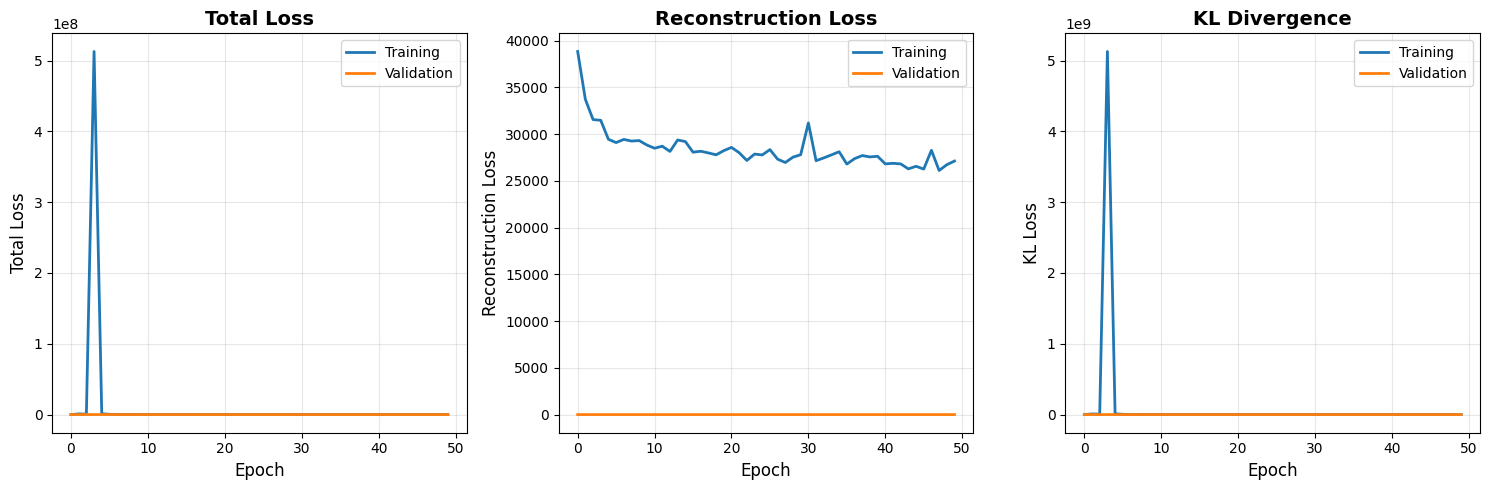


✓ Training complete!


In [15]:
# ========================================
# CELL 5: Train VAE
# ========================================
print("\n" + "="*60)
print("TRAINING VAE")
print("="*60)

history = vae.fit(
    X,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Total Loss', fontsize=12)
plt.legend()
plt.title('Total Loss', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(history.history['recon_loss'], label='Training', linewidth=2)
plt.plot(history.history['val_recon_loss'], label='Validation', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Reconstruction Loss', fontsize=12)
plt.legend()
plt.title('Reconstruction Loss', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(history.history['kl_loss'], label='Training', linewidth=2)
plt.plot(history.history['val_kl_loss'], label='Validation', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('KL Loss', fontsize=12)
plt.legend()
plt.title('KL Divergence', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(base_path + 'results/visualizations/training_history.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Training complete!")

In [19]:
# ========================================
# CELL 6: Extract Latent Features
# ========================================
print("\n" + "="*60)
print("EXTRACTING LATENT FEATURES")
print("="*60)

z_mean, _, _ = encoder.predict(X, verbose=0)
# Removed .numpy() as z_mean is already a numpy array
# z_mean = z_mean.numpy()
print(f"✓ Latent features shape: {z_mean.shape}")


EXTRACTING LATENT FEATURES
✓ Latent features shape: (683, 64)


In [18]:
# ========================================
# CELL 7: VAE + K-Means Clustering
# ========================================
print("\n" + "="*60)
print("VAE + K-MEANS CLUSTERING")
print("="*60)

n_clusters = 5
kmeans_vae = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
vae_clusters = kmeans_vae.fit_predict(z_mean)

vae_silhouette = silhouette_score(z_mean, vae_clusters)
vae_calinski = calinski_harabasz_score(z_mean, vae_clusters)

print(f"\nVAE + K-Means Results:")
print(f"  Silhouette Score: {vae_silhouette:.4f}")
print(f"  Calinski-Harabasz Index: {vae_calinski:.4f}")
print(f"  Cluster sizes: {np.bincount(vae_clusters)}")

# ========================================
# CELL 8: Baseline (PCA + K-Means)
# ========================================
print("\n" + "="*60)
print("BASELINE: PCA + K-MEANS")
print("="*60)

# PCA with same latent dimension
pca = PCA(n_components=latent_dim)
pca_features = pca.fit_transform(X)
print(f"✓ PCA features shape: {pca_features.shape}")
print(f"✓ Explained variance: {pca.explained_variance_ratio_.sum():.4f}")

# K-Means on PCA
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
pca_clusters = kmeans_pca.fit_predict(pca_features)

pca_silhouette = silhouette_score(pca_features, pca_clusters)
pca_calinski = calinski_harabasz_score(pca_features, pca_clusters)

print(f"\nPCA + K-Means Results:")
print(f"  Silhouette Score: {pca_silhouette:.4f}")
print(f"  Calinski-Harabasz Index: {pca_calinski:.4f}")
print(f"  Cluster sizes: {np.bincount(pca_clusters)}")


VAE + K-MEANS CLUSTERING

VAE + K-Means Results:
  Silhouette Score: 0.1717
  Calinski-Harabasz Index: 144.5896
  Cluster sizes: [ 87 223  88 155 130]

BASELINE: PCA + K-MEANS
✓ PCA features shape: (683, 64)
✓ Explained variance: 0.6609

PCA + K-Means Results:
  Silhouette Score: 0.1026
  Calinski-Harabasz Index: 145.3769
  Cluster sizes: [ 73 218 124 124 144]


In [20]:
# ========================================
# CELL 8: Baseline (PCA + K-Means)
# ========================================
print("\n" + "="*60)
print("BASELINE: PCA + K-MEANS")
print("="*60)

# PCA with same latent dimension
pca = PCA(n_components=latent_dim)
pca_features = pca.fit_transform(X)
print(f"✓ PCA features shape: {pca_features.shape}")
print(f"✓ Explained variance: {pca.explained_variance_ratio_.sum():.4f}")

# K-Means on PCA
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
pca_clusters = kmeans_pca.fit_predict(pca_features)

pca_silhouette = silhouette_score(pca_features, pca_clusters)
pca_calinski = calinski_harabasz_score(pca_features, pca_clusters)

print(f"\nPCA + K-Means Results:")
print(f"  Silhouette Score: {pca_silhouette:.4f}")
print(f"  Calinski-Harabasz Index: {pca_calinski:.4f}")
print(f"  Cluster sizes: {np.bincount(pca_clusters)}")

# ========================================
# CELL 9: Comparison Summary
# ========================================
print("\n" + "="*60)
print("COMPARISON SUMMARY")
print("="*60)

comparison_df = pd.DataFrame({
    'Method': ['VAE + K-Means', 'PCA + K-Means'],
    'Silhouette Score': [vae_silhouette, pca_silhouette],
    'Calinski-Harabasz Index': [vae_calinski, pca_calinski]
})

print(comparison_df.to_string(index=False))

# Determine winner
if vae_silhouette > pca_silhouette:
    print(f"\n✓ VAE outperforms PCA by {((vae_silhouette - pca_silhouette) / pca_silhouette * 100):.2f}%")
else:
    print(f"\n✓ PCA outperforms VAE by {((pca_silhouette - vae_silhouette) / vae_silhouette * 100):.2f}%")

# Save metrics
comparison_df.to_csv(base_path + 'results/metrics/clustering_metrics.csv', index=False)
print(f"\n✓ Metrics saved to: {base_path}results/metrics/clustering_metrics.csv")


BASELINE: PCA + K-MEANS
✓ PCA features shape: (683, 64)
✓ Explained variance: 0.6609

PCA + K-Means Results:
  Silhouette Score: 0.1037
  Calinski-Harabasz Index: 145.4049
  Cluster sizes: [ 73 222 123 128 137]

COMPARISON SUMMARY
       Method  Silhouette Score  Calinski-Harabasz Index
VAE + K-Means          0.171698               144.589600
PCA + K-Means          0.103703               145.404892

✓ VAE outperforms PCA by 65.57%

✓ Metrics saved to: /content/drive/MyDrive/24341180_425Project/results/metrics/clustering_metrics.csv



GENERATING t-SNE VISUALIZATIONS


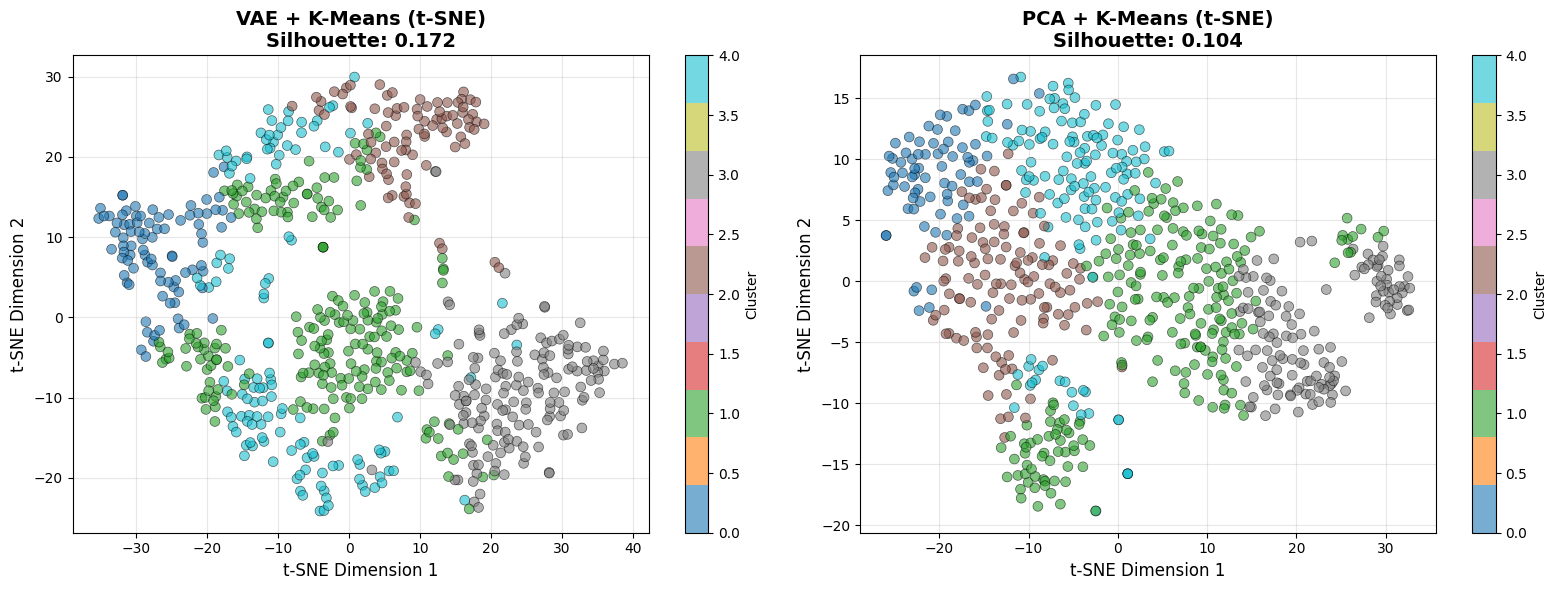

✓ t-SNE visualizations saved!


In [21]:
# ========================================
# CELL 10: t-SNE Visualization
# ========================================
print("\n" + "="*60)
print("GENERATING t-SNE VISUALIZATIONS")
print("="*60)

from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_vae = tsne.fit_transform(z_mean)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_pca = tsne.fit_transform(pca_features)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# VAE t-SNE
scatter1 = axes[0].scatter(tsne_vae[:, 0], tsne_vae[:, 1],
                           c=vae_clusters, cmap='tab10', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[0].set_title(f'VAE + K-Means (t-SNE)\nSilhouette: {vae_silhouette:.3f}',
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('t-SNE Dimension 1', fontsize=12)
axes[0].set_ylabel('t-SNE Dimension 2', fontsize=12)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')
axes[0].grid(True, alpha=0.3)

# PCA t-SNE
scatter2 = axes[1].scatter(tsne_pca[:, 0], tsne_pca[:, 1],
                           c=pca_clusters, cmap='tab10', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[1].set_title(f'PCA + K-Means (t-SNE)\nSilhouette: {pca_silhouette:.3f}',
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('t-SNE Dimension 1', fontsize=12)
axes[1].set_ylabel('t-SNE Dimension 2', fontsize=12)
plt.colorbar(scatter2, ax=axes[1], label='Cluster')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(base_path + 'results/visualizations/tsne_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ t-SNE visualizations saved!")


GENERATING UMAP VISUALIZATIONS


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


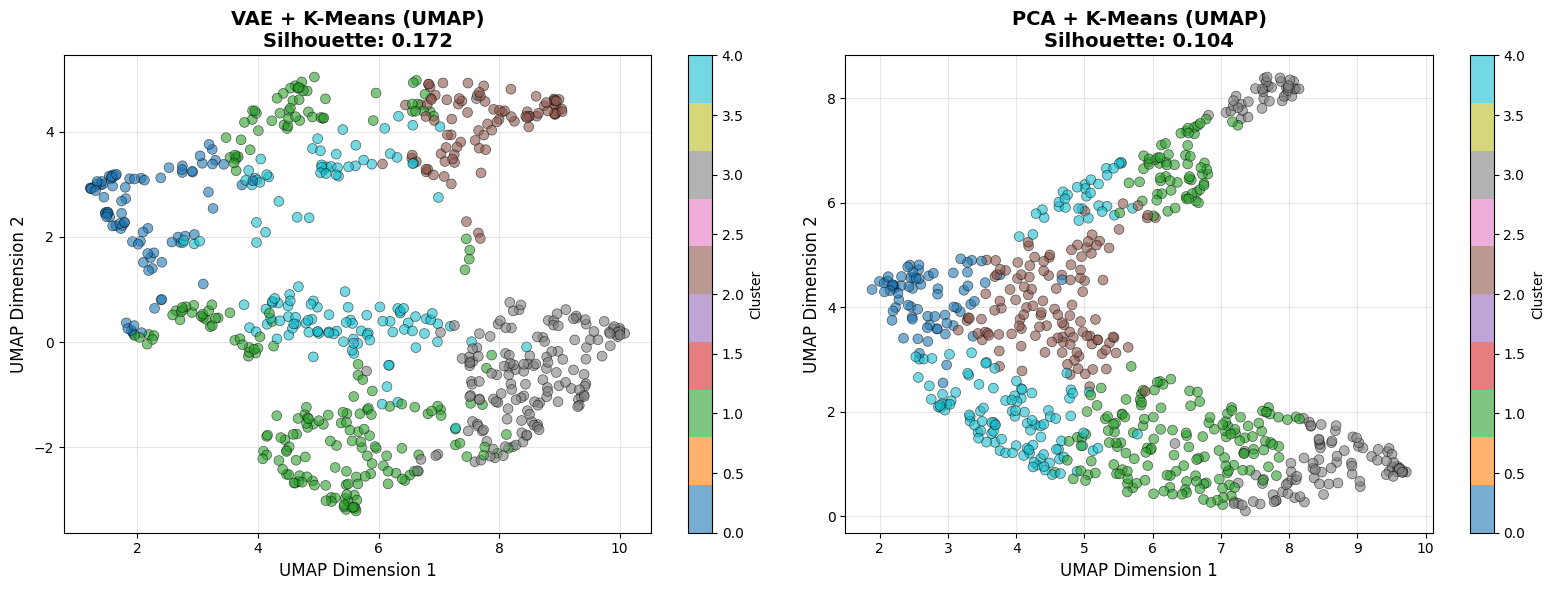

✓ UMAP visualizations saved!


In [22]:
# ========================================
# CELL 11: UMAP Visualization
# ========================================
print("\n" + "="*60)
print("GENERATING UMAP VISUALIZATIONS")
print("="*60)

import umap

# Apply UMAP
reducer = umap.UMAP(random_state=42, n_neighbors=15, min_dist=0.1)
umap_vae = reducer.fit_transform(z_mean)

reducer = umap.UMAP(random_state=42, n_neighbors=15, min_dist=0.1)
umap_pca = reducer.fit_transform(pca_features)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# VAE UMAP
scatter1 = axes[0].scatter(umap_vae[:, 0], umap_vae[:, 1],
                           c=vae_clusters, cmap='tab10', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[0].set_title(f'VAE + K-Means (UMAP)\nSilhouette: {vae_silhouette:.3f}',
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('UMAP Dimension 1', fontsize=12)
axes[0].set_ylabel('UMAP Dimension 2', fontsize=12)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')
axes[0].grid(True, alpha=0.3)

# PCA UMAP
scatter2 = axes[1].scatter(umap_pca[:, 0], umap_pca[:, 1],
                           c=pca_clusters, cmap='tab10', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[1].set_title(f'PCA + K-Means (UMAP)\nSilhouette: {pca_silhouette:.3f}',
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('UMAP Dimension 1', fontsize=12)
axes[1].set_ylabel('UMAP Dimension 2', fontsize=12)
plt.colorbar(scatter2, ax=axes[1], label='Cluster')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(base_path + 'results/visualizations/umap_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ UMAP visualizations saved!")

In [23]:
# ========================================
# CELL 12: Save Everything
# ========================================
print("\n" + "="*60)
print("SAVING RESULTS")
print("="*60)

# Save models
vae.save(base_path + 'results/models/vae_model.h5')
encoder.save(base_path + 'results/models/encoder_model.h5')
decoder.save(base_path + 'results/models/decoder_model.h5')
print("✓ Models saved")

# Save latent features
np.save(base_path + 'results/latent_features_vae.npy', z_mean)
np.save(base_path + 'results/latent_features_pca.npy', pca_features)
print("✓ Latent features saved")

# Save clusters
np.save(base_path + 'results/clusters_vae.npy', vae_clusters)
np.save(base_path + 'results/clusters_pca.npy', pca_clusters)
print("✓ Cluster assignments saved")

print("\n" + "="*60)
print("EASY TASK COMPLETE! 🎉")
print("="*60)
print("\nAll results saved in:", base_path + "results/")
print("\nYou now have:")
print("  ✓ Trained VAE model")
print("  ✓ Clustering results (VAE + PCA)")
print("  ✓ Metrics (Silhouette, Calinski-Harabasz)")
print("  ✓ Visualizations (t-SNE, UMAP)")
print("  ✓ All files for your report")


SAVING RESULTS


✓ Models saved
✓ Latent features saved
✓ Cluster assignments saved

EASY TASK COMPLETE! 🎉

All results saved in: /content/drive/MyDrive/24341180_425Project/results/

You now have:
  ✓ Trained VAE model
  ✓ Clustering results (VAE + PCA)
  ✓ Metrics (Silhouette, Calinski-Harabasz)
  ✓ Visualizations (t-SNE, UMAP)
  ✓ All files for your report
